In [ ]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
%matplotlib inline

Data was produced using:

* SIMQSO templates
```
quickquasars -i $DESI_MOCKS/lya_forest/london/v2.0/17/1712/transmission-16-1712.fits --zmin 1.6 --nproc 10 --downsampling 1. --seed 42 --zbest --outdir ./SIMQSO --simqso --overwrite --exptime 1E6
```

* QSO templates
```
quickquasars -i $DESI_MOCKS/lya_forest/london/v2.0/17/1712/transmission-16-1712.fits --zmin 1.6 --nproc 10 --downsampling 1. --seed 42 --zbest --outdir ./QSO --overwrite --exptime 1E6
```

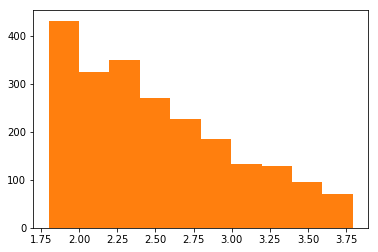

In [14]:
template = 'SIMQSO'
path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
filename = 'zbest-16-1712.fits'
zbest_simqso = Table.read(path+filename)
template = 'QSO'
path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
filename = 'zbest-16-1712.fits'
zbest_qso = Table.read(path+filename)

_ = plt.hist(zbest_qso['Z'])

In [16]:
zbest_qso

CHI2,COEFF [4],Z,ZERR,ZWARN,SPECTYPE,SUBTYPE,TARGETID,DELTACHI2,BRICKNAME
float64,float64,float64,float64,int64,str96,str16,int64,float64,str8
0.0,0.0 .. 0.0,2.92521676701,0.0,0,QSO,,110243394,25.0,
0.0,0.0 .. 0.0,3.22042488097,0.0,0,QSO,,110243400,25.0,
0.0,0.0 .. 0.0,2.92588327988,0.0,0,QSO,,110243401,25.0,
0.0,0.0 .. 0.0,3.27664513327,0.0,0,QSO,,110243403,25.0,
0.0,0.0 .. 0.0,2.41682845633,0.0,0,QSO,,110243595,25.0,
0.0,0.0 .. 0.0,2.52984045842,0.0,0,QSO,,110243599,25.0,
0.0,0.0 .. 0.0,2.85253727209,0.0,0,QSO,,110243608,25.0,
0.0,0.0 .. 0.0,2.43086421629,0.0,0,QSO,,110243831,25.0,
0.0,0.0 .. 0.0,2.92086275527,0.0,0,QSO,,110243843,25.0,


In [21]:
def get_qso_data(filename):
    hdus = fits.open(filename)
    return hdus[1].data

In [26]:
template = 'QSO'
path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
filename = 'spectra-16-1712.fits'
qso_data = get_qso_data(path+filename)

template = 'SIMQSO'
path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
filename = 'spectra-16-1712.fits'
simqso_data = get_qso_data(path+filename)

In [28]:
Table(simqso_data)

OBJTYPE,TARGETCAT,BRICKNAME,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,MAG [5],FILTER [5],SPECTROID,POSITIONER,LOCATION,DEVICE_LOC,PETAL_LOC,FIBER,LAMBDAREF,RA_TARGET,DEC_TARGET,RA_OBS,DEC_OBS,X_TARGET,Y_TARGET,X_FVCOBS,Y_FVCOBS,Y_FVCERR,X_FVCERR,NIGHT,EXPID,TILEID
str10,str20,str8,int64,int64,int64,int64,float32,str10,int64,int32,int32,int32,int32,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,int32,int32,int32
,,,110243394,4,0,0,0.0 .. 0.0,..,0,95,95,95,0,0,5400.0,158.207199097,4.03046989441,158.207199097,4.03046989441,-4.13464340313,-176.016389199,-4.13464340313,-176.016389199,0.0,0.0,20180808,0,0
,,,110243400,4,0,0,0.0 .. 0.0,..,0,62,62,62,0,1,5400.0,157.795379639,3.85358953476,157.795379639,3.85358953476,-45.5863791815,-157.134697634,-45.5863791815,-157.134697634,0.0,0.0,20180808,0,0
,,,110243401,4,0,0,0.0 .. 0.0,..,0,102,102,102,0,2,5400.0,156.704559326,4.02093505859,156.704559326,4.02093505859,-48.26471976,-194.58679079,-48.26471976,-194.58679079,0.0,0.0,20180808,0,0
,,,110243403,4,0,0,0.0 .. 0.0,..,0,82,82,82,0,3,5400.0,157.097488403,3.80809760094,157.097488403,3.80809760094,-31.5795923296,-172.635369698,-31.5795923296,-172.635369698,0.0,0.0,20180808,0,0
,,,110243595,4,0,0,0.0 .. 0.0,..,0,131,131,131,0,4,5400.0,157.155334473,4.4489030838,157.155334473,4.4489030838,6.67200636809,-201.385810488,6.67200636809,-201.385810488,0.0,0.0,20180808,0,0
,,,110243599,4,0,0,0.0 .. 0.0,..,0,108,108,108,0,5,5400.0,157.497238159,4.32103157043,157.497238159,4.32103157043,13.1352857547,-181.585171402,13.1352857547,-181.585171402,0.0,0.0,20180808,0,0
,,,110243608,4,0,0,0.0 .. 0.0,..,0,119,119,119,0,6,5400.0,157.226303101,4.09597969055,157.226303101,4.09597969055,9.91914629057,-191.490598774,9.91914629057,-191.490598774,0.0,0.0,20180808,0,0
,,,110243831,4,0,0,0.0 .. 0.0,..,0,64,64,64,0,7,5400.0,157.122253418,4.45268535614,157.122253418,4.45268535614,-25.1362017254,-152.830188325,-25.1362017254,-152.830188325,0.0,0.0,20180808,0,0
,,,110243843,4,0,0,0.0 .. 0.0,..,0,72,72,72,0,8,5400.0,156.797241211,4.08834505081,156.797241211,4.08834505081,-38.5997312986,-164.880825023,-38.5997312986,-164.880825023,0.0,0.0,20180808,0,0


In [4]:
np.where(a['Z']>2.0)

(array([   0,    1,    2, ..., 2215, 2216, 2217]),)

In [5]:
def get_qso_flux(filename, qso_id):
    hdus = fits.open(filename)
    b_lambda = hdus[2].data
    b_flux = hdus[3].data
    r_lambda = hdus[7].data
    r_flux = hdus[8].data
    z_lambda = hdus[12].data
    z_flux = hdus[13].data
    np.shape(b_flux), np.shape(b_lambda)
    all_lambda = np.append(b_lambda, r_lambda)
    all_lambda = np.append(all_lambda, z_lambda)
    all_flux = np.append(b_flux[qso_id,:], r_flux[qso_id,:])
    all_flux = np.append(all_flux, z_flux[qso_id,:])
    return b_lambda, b_flux[qso_id,:]

In [29]:
def plot_qso_results(qso_id):
    template = 'QSO'
    path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
    filename = 'spectra-16-1712.fits'
    qso_lambda, qso_flux = get_qso_flux(path+filename, qso_id)
    template = 'SIMQSO'
    path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
    filename = 'spectra-16-1712.fits'
    simqso_lambda, simqso_flux = get_qso_flux(path+filename, qso_id)

    plt.figure(figsize=(8,8))

    plt.subplot(211)
    plt.plot(qso_lambda, qso_flux, color='blue', alpha=0.5, label='QSO')
    plt.plot(simqso_lambda, simqso_flux, color='red', alpha=0.5, label='SIMQSO')
    plt.legend()
    plt.xlabel("Lambda [Angstrom]")
    plt.ylabel("Flux [1e-17 erg/(s cm2 Angstrom)]")

    #plt.subplot(212)
    #plt.plot(qso_lambda, qso_flux/simqso_flux, color='red', alpha=0.5)
    #plt.xlabel("Lambda [Angstrom]")
    #plt.ylabel("Flux QSO / Flux SIMQSO")

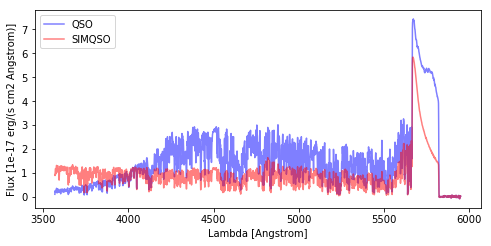

In [30]:
plot_qso_results(13)

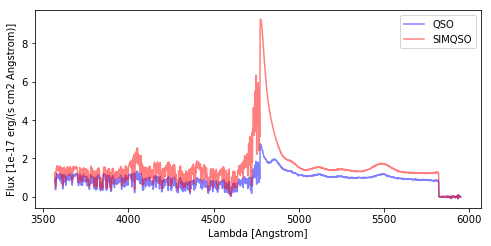

In [31]:
plot_qso_results(0)

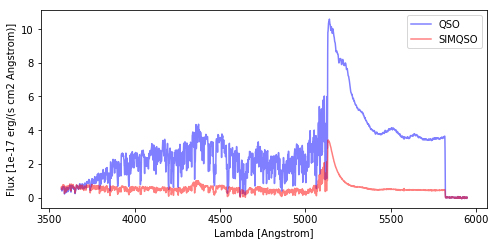

In [32]:
plot_qso_results(1)